In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bond Pricing
The price of any financial instrument is equal to the present value of the expected cash-flow. \
The interest/discount rate is used to compute the present value, dependent on yield offered on comparable securities in the market.

### Cash-Flow

The cash-flow is of an option-free bond consists of:
1. periodic coupon interest rates (to maturity date)
2. the par/maturity value (at maturity)

**Note:** The only case is which the cash-flow is ever fully known, is in the case of a fixed-rate, option free bonds. It is assumed here for simplicity.

##### Example

&emsp; Bond Length - $20$ years <br>
&emsp; Coupon Rate - $9\%$ <br>
&emsp; Maturity Value - $\$1,000$

In [2]:
bond_len = 20
coupon_per = .09 # yearly rate
par_val = 1000

coupon_per = par_val * coupon_per / 2 

print('Semiannual Coupon Rate - ${:.2f} for {} periods'.format(coupon_per, bond_len * 2))
print('Maturity Value - ${:.2f}'.format(par_val))

Semiannual Coupon Rate - $45.00 for 40 periods
Maturity Value - $1000.00


**Note:** There are 40 semiannual periods of cash-flows of \\$45 and \\$1,000 cash-flow 40 six-month periods from now. \
**Note:** The treatment of the par value is treated on a *consistent* basis with the coupon payments.

##### Formula with Examples

In [3]:
def bond_cash_flow_calc(bond_len, coupon_per, par_val, len_time='annual', details=True):
    """ Calculate Cash-flows for a Bond
    
    Given args are converted into numpy arrrays. 
    They are then used to calculate what the payout is for a bond during its life into maturity.
    
    Args:
        bond_len (int): Number of bond periods before maturity.
        coupon_per (float): Current interest rate return on a bond per specified period.
        par_val (float): Value of bond at par.
        len_time (str): Period length designation.
        details (bool): Determines whether to print calculation results.
        
    Returns:
        np.float: The 1st return value. Number of payments per period.
        np.float: The 2nd return value. Return of par value at maturity.
        np.float: The 3rd return value. Number of periods of return.
        
    """
    
    # convert to numpy arrays
    bond_len = np.array(bond_len)
    coupon_per = np.array(coupon_per)
    par_val = np.array(par_val)
    
    # fail safe
    if (bond_len.size != coupon_per.size) | (coupon_per.size != par_val.size):
        return 'Incorrect argument dimensions'
    if len_time.lower() not in ('semiannual', 'annual'):
        return 'Incorrect period length description'

    # adjust fields based on length of bond period
    period = np.where(len_time.lower()=='semiannual', 2, 1)
    bond_len = np.multiply(bond_len, period)
    coupon_per = np.divide(coupon_per, period)
    
    # adjust for given coupon rate format
    coupon_per = np.where(coupon_per > 1, np.divide(coupon_per, 100), coupon_per)
    
    # calculate cash-flow
    coupon_per = np.multiply(par_val, coupon_per)
    
    if details:
        if bond_len.size == 1:
            print(len_time.capitalize() + ' Coupon Rate - ${:.2f} for {} periods'.format(coupon_per, bond_len))
            print('Maturity Value - ${:.2f}'.format(par_val))
        else:
            np.set_printoptions(precision=2)
            print(len_time.capitalize() + ' Coupon Rate - ${} for {} periods'.format(coupon_per, bond_len))
            print('Maturity Value - ${}'.format(par_val))
        
    return coupon_per, par_val, bond_len

&emsp; Bond Length - $20$ years <br>
&emsp; Coupon Rate - $9\%$ <br>
&emsp; Maturity Value - $\$1,000$

In [4]:
bond_cash_flow_calc(bond_len=20, coupon_per=.09, par_val=1000, len_time='semiannual')

Semiannual Coupon Rate - $45.00 for 40 periods
Maturity Value - $1000.00


(45.0, array(1000), 40)

&emsp; Bond Length - $20$, $20$ years <br>
&emsp; Coupon Rate - $9\%$, $9\%$ <br>
&emsp; Maturity Value - $\$1,000$, $\$1,000$

In [5]:
bond_cash_flow_calc(bond_len=[20, 10], coupon_per=[.09, .19], par_val=[1000, 1000], len_time='semiannual')

Semiannual Coupon Rate - $[45. 95.] for [40 20] periods
Maturity Value - $[1000 1000]


(array([45., 95.]), array([1000, 1000]), array([40, 20]))

### Required Yield

The interest rate an investor desires from investing in a bond. Specified as an annual interest rate. When bonds are based off of a semiannual (or less) period, the effective annual yield would be greater than the annual interest rate (compounding).

**Note:** Comparable bonds are selected based on required yield, only in the context of option free bonds for the following analyses. \
**Note:** Theoretically, each period is measured by different yields. The following examination applies consideration for a single yield.

### Bond Price

To calculate the cost of a bond for an investor, we need the following:
1. Cash-flow
2. Required Yield

One can then calculate the bond price.

#### Price Calculation Formula
The price formula is given by:
$$p=c\left[\frac{1-\left\{\frac{1}{(1+i)^n}\right\}}{i}\right]+\frac{M}{(1+i)^n}$$
where <br> 
&emsp; $p=$ price $(\$)$ <br> 
&emsp; $c=$ semiannual coupon payment $(\$)$ <br> 
&emsp; $n=$ number of periods (number of years x 2) <br> 
&emsp; $i=$ periodic interest rate (required yield / 2) <br> 
&emsp;$M=$ maturity/par value

##### Formula with Examples

In [6]:
def bond_price_calc(bond_len, coupon_per, par_val, req_yield_per, len_time='annual', details=True):
    """ Calculate Pricing for a Bond
    
    Given args are converted into numpy arrrays. 
    They are then used to calculate what the payout is for a bond during its life into maturity.
    
    Args:
        bond_len (int): Number of bond periods before maturity.
        coupon_per (float): Current interest rate return on a bond per specified period.
        par_val (float): Value of bona at par.
        req_yield_per (float): Expected yearly return on bond.
        len_time (str): Period length designation.
        details (bool): Determines whether to print calculation results.
        
    Returns:
        np.float: The 1st return value. The price of the coupon payment.
        np.float: The 2nd return value. The value at maturity.
        np.float: The 3rd return value. The current price of the bond.
        
    """
    # convert to numpy arrays
    bond_len = np.array(bond_len)
    coupon_per = np.array(coupon_per)
    par_val = np.array(par_val)
    req_yield_per = np.array(req_yield_per)
    
    # fail safe
    if (bond_len.size != coupon_per.size) | (coupon_per.size != par_val.size):
        return 'Incorrect argument dimensions'
    if len_time.lower() not in ('semiannual', 'annual'):
        return 'Incorrect period length description'
    
    # adjust fields based on length of bond period
    p1 = np.where(len_time.lower()=='semiannual', np.divide(12.0, 6.0), 0.0)
    p2 = np.where(len_time.lower()=='annual', np.divide(12.0, 12.0), 0.0)
    period = np.add(p1, p2)
    bond_len = np.multiply(bond_len, period)
    coupon_per = np.divide(coupon_per, period)
    req_yield_per = np.divide(req_yield_per, period)
    
    # adjust for given coupon rate format
    coupon_per = np.where(coupon_per > 1, np.divide(coupon_per, 100), coupon_per)
    req_yield_per = np.where(req_yield_per > 1, np.divide(req_yield_per, 100), req_yield_per)
    
    # calculate cash-flow
    coupon_pay, par_val = bond_cash_flow_calc(bond_len, coupon_per, par_val, len_time='annual', details=details)[0:2]
    
    # calculate price
    coupon_pay_price = np.round(np.multiply(coupon_pay, np.divide(np.subtract(1, np.divide(1, np.power(np.add(1, req_yield_per), bond_len))), req_yield_per)), decimals=2)
    par_val_price = np.round(np.multiply(par_val, np.divide(1, np.power(np.add(1, req_yield_per), bond_len))), decimals=2)
    bond_price = np.round(np.add(coupon_pay_price, par_val_price), decimals=2)
    
    if details:
        if (bond_len.size == 1) & (req_yield_per.size == 1):
            print('Present Value of Coupon Payment - ${:.2f}'.format(coupon_pay_price))
            print('Present Value of Par/Maturity Value - ${:.2f}'.format(par_val_price))
            print('Present Value of Bond - ${:.2f}'.format(bond_price))
        else:
            np.set_printoptions(precision=2)
            print('Present Value of Coupon Payment - ${}'.format(coupon_pay_price))
            print('Present Value of Par/Maturity Value - ${}'.format(par_val_price))
            print('Present Value of Bond - ${}'.format(bond_price))
        
    return coupon_pay_price, par_val_price, bond_price

&emsp; Bond Length - $20$ years <br>
&emsp; Coupon Rate - $9\%$ <br>
&emsp; Maturity Value - $\$1,000$ <br>
&emsp; Required Yield - $12\%$

In [7]:
bond_price_calc(bond_len=20, coupon_per=.09, par_val=1000, req_yield_per=.12, len_time='semiannual')

Annual Coupon Rate - $45.00 for 40.0 periods
Maturity Value - $1000.00
Present Value of Coupon Payment - $677.08
Present Value of Par/Maturity Value - $97.22
Present Value of Bond - $774.30


(677.08, 97.22, 774.3)

&emsp; Bond Length - $20$ years <br>
&emsp; Coupon Rate - $9\%$ <br>
&emsp; Maturity Value - $\$1,000$ <br>
&emsp; Required Yield - $7\%$

In [8]:
bond_price_calc(bond_len=20, coupon_per=.09, par_val=1000, req_yield_per=.07, len_time='semiannual')

Annual Coupon Rate - $45.00 for 40.0 periods
Maturity Value - $1000.00
Present Value of Coupon Payment - $960.98
Present Value of Par/Maturity Value - $252.57
Present Value of Bond - $1213.55


(960.98, 252.57, 1213.55)

&emsp; Bond Length - $20$, $20$ years <br>
&emsp; Coupon Rate - $9\%$, $9\%$ <br>
&emsp; Maturity Value - $\$1,000$, $\$1,000$ <br>
&emsp; Required Yield - $12\%$, $7\%$

In [9]:
bond_price_calc(bond_len=[20,20], coupon_per=[.09,.09], par_val=[1000,1000], req_yield_per=[.12,.07], len_time='semiannual')

Annual Coupon Rate - $[45. 45.] for [40. 40.] periods
Maturity Value - $[1000 1000]
Present Value of Coupon Payment - $[677.08 960.98]
Present Value of Par/Maturity Value - $[ 97.22 252.57]
Present Value of Bond - $[ 774.3  1213.55]


(array([677.08, 960.98]), array([ 97.22, 252.57]), array([ 774.3 , 1213.55]))

&emsp; Bond Length - $20$ years <br>
&emsp; Coupon Rate - $9\%$ <br>
&emsp; Maturity Value - $\$1,000$ <br>
&emsp; Required Yield - $5\%$, $6\%$, $7\%$, $8\%$, $9\%$, $10\%$, $11\%$, $12\%$, $13\%$, $14\%$, 

In [10]:
bond_price_calc(bond_len=20, coupon_per=.09, par_val=1000, req_yield_per=np.arange(.05, .15, .01), len_time='semiannual')

Annual Coupon Rate - $45.00 for 40.0 periods
Maturity Value - $1000.00
Present Value of Coupon Payment - $[1129.62 1040.16  960.98  890.67  828.07  772.16  722.08  677.08  636.55
  599.93]
Present Value of Par/Maturity Value - $[372.43 306.56 252.57 208.29 171.93 142.05 117.46  97.22  80.54  66.78]
Present Value of Bond - $[1502.05 1346.72 1213.55 1098.96 1000.    914.21  839.54  774.3   717.09
  666.71]


(array([1129.62, 1040.16,  960.98,  890.67,  828.07,  772.16,  722.08,
         677.08,  636.55,  599.93]),
 array([372.43, 306.56, 252.57, 208.29, 171.93, 142.05, 117.46,  97.22,
         80.54,  66.78]),
 array([1502.05, 1346.72, 1213.55, 1098.96, 1000.  ,  914.21,  839.54,
         774.3 ,  717.09,  666.71]))

[1502.05, 1346.72, 1213.55, 1098.96, 1000.0, 914.21, 839.54, 774.3, 717.09, 666.71]


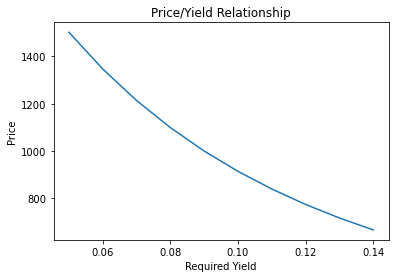

,Price
Required Yield,
0.05,1502.05
0.06,1346.72
0.07,1213.55
0.08,1098.96
0.09,1000.00
0.10,914.21
0.11,839.54
0.12,774.30
0.13,717.09


In [11]:
x = np.arange(.05, .15, .01)
y = bond_price_calc(bond_len=20, coupon_per=.09, par_val=1000, req_yield_per=np.arange(.05, .15, .01), len_time='semiannual', details=False)[2]
print(list(y))

# graph the example for different required yields
fig = plt.figure()

plt.plot(x, y)

# set labels
plt.xlabel('Required Yield')
plt.ylabel('Price')
plt.title('Price/Yield Relationship')

plt.show()

# # add table
pd.DataFrame(data=np.transpose([x,y]), columns=['Required Yield', 'Price']).set_index('Required Yield')

### Time Path of a Bond

A bond bought at par, is bought at par. However, if the required yield goes above(below) the coupon rate, this will lead to a price decrease(increase) to compensate for the greater(lower) yield to the investor buying. Price has to move for different required yields since bond coupon rates and length are set at issuance.

When a bond is bought at issuance, it is typically being sold with a coupon rate equal to the required yield. 

There are three scenarios for the price of a bond to change accross time if **no** changes are ever made to the required yields:
1. For a bond being sold at par, the price will remain stable as it approaches maturity.
2. For a bond being sold at discount, the price will increase as it approaches maturity.
3. For a bond being sold at premium, the price will decrease as it approaches maturity.

#### Reasons for Price Change
 - Interest Rate Changes - interest rates increases(decreases) lead to price decreases(increases)
 - Change in Price - unrelated to required yield changes
 - Non-Treasury Bond Impacted by Spread in Treasury Yields - rates do not need to change, but changes in spread can impact
 - Credit Quality of Issuer - improved(deteriorated) perceived credit quality may lead to increased(decreased) prices
 - Bond with Option - embedded options, such as callable, puttable or convertible bonds may affect pricing

##### Example

In [13]:
x = np.arange(20, -2, -2)
length = x.size
y = bond_price_calc(bond_len=x, coupon_per=[.09]*length, par_val=[1000]*length, req_yield_per=[.12]*length, len_time='semiannual', details=False)[2]
z = bond_price_calc(bond_len=x, coupon_per=[.09]*length, par_val=[1000]*length, req_yield_per=[.07]*length, len_time='semiannual', details=False)[2]
j = bond_price_calc(bond_len=x, coupon_per=[.09]*length, par_val=[1000]*length, req_yield_per=[.09]*length, len_time='semiannual', details=False)[2]

# add table
print('\nTime Paths of 20-Year, 9% Coupon Discount Sold at Discount and Premium')
pd.DataFrame(data=np.array([x, y, j, z]).T, columns=['Years Remaining to Maturity','Price of Discount Bond', 'Price of at Par Bond', 'Price of Premium Bond']).set_index('Years Remaining to Maturity')


Time Paths of 20-Year, 9% Coupon Discount Sold at Discount and Premium


,Price of Discount Bond,Price of at Par Bond,Price of Premium Bond
Years Remaining to Maturity,,,
20.0,774.30,1000.0,1213.55
18.0,780.68,1000.0,1202.90
16.0,788.74,1000.0,1190.69
14.0,798.91,1000.0,1176.67
12.0,811.75,1000.0,1160.59
10.0,827.95,1000.0,1142.13
8.0,848.42,1000.0,1120.95
6.0,874.24,1000.0,1096.63
4.0,906.85,1000.0,1068.74


### Zero-Coupon Bond

The pricing of a zero-coupon bond is no different than pricing of a coupon bond; its price is the present value of the expected cash-flows. In this case, that only cash-flow is the maturity value.

##### Example

&emsp; Bond Length - $10$ years <br>
&emsp; Maturity Value - $\$1,000$ <br>
&emsp; Required Yield - $8.6\%$

In [14]:
bond_price_calc(bond_len=10, coupon_per=0, par_val=1000, req_yield_per=8.6, len_time='semiannual')[2]

Annual Coupon Rate - $0.00 for 20.0 periods
Maturity Value - $1000.00
Present Value of Coupon Payment - $0.00
Present Value of Par/Maturity Value - $430.84
Present Value of Bond - $430.84


430.84

### Pricing When Settlement Date Falls between Coupon Periods

All assumptions to now assumed the settlement occurrs the day after a coupon payment. More reasonably, it will fall in-between coupon payments. In order to compensate, calculations are done to pro-rate the pricing.

Based on the type of bond, the calculation may be done differently:
- Treasury - actual/actual; based on actual count of days, and 365 days in a nonleap year
- Corporate and Municipal - 30/60; based on 30 day months and 360 days in a year

#### Compounding Calculation Formula

Once the number of days have been determined, then to determine price, once must calculate the time ratio and price by compound formula.

The time ratio is given by:
$$w=\frac{number\ of\ days\ between\ settlement\ and\ next\ coupon\ date}{number\ of\ days\ in\ coupon\ period}$$
The price formula is given by:
$$p=\frac{c}{\left(1+i\right)^w}+\frac{c}{\left(1+i\right)^{1+w}}+\frac{c}{\left(1+i\right)^{2+w}}+...+\frac{c}{\left(1+i\right)^{n-1+w}}+\frac{M}{\left(1+i\right)^{n-1+w}}$$
where <br> 
&emsp; $p=$ price $(\$)$ <br> 
&emsp; $c=$ semiannual coupon payment $(\$)$ <br> 
&emsp; $n=$ number of periods (number of years x 2) <br> 
&emsp; $i=$ periodic interest rate (required yield / 2) <br> 
&emsp;$M=$ maturity/par value

#### Accrued Interest

The buyer is expected to compensate the seller for the portion of the next coupon interest payment the seller has earned but will not receive from the issuer because the issuer will send this next payment to the buyer. This is called accrued interest and depends on time (in days) between last coupon payment and settlement date. 

The accured interest is given by:
$$AI=c\left(\frac{number\ of\ days\ from\ last\ coupon\ payment\ to\ settlement\ date}{number\ of\ days\ in\ coupon\ period}\right)$$
where <br> 
&emsp; $AI=$ accrued interest $(\$)$ <br> 
&emsp;&emsp; $c=$ semiannual coupon payment $(\$)$ <br> 



##### Formula with Examples

In [15]:
def actual_time_ratio_calc(nd1, sd2, period):
    """ Calculate Ratio of Days Between Two Dates to Days in a Year
     
    They are then used to calculate days between settlement date and maturity date based on days in a year.
    Based on the fllowing option:
       - Actual: Direct count of days between dates
    Used to calculate time ratio for a given count of days in a year.
    
    Args:
        nd1 (date): Date of next payout for a bond.
        sd2 (date): Date of settlement for a bond, or official purchase date.
        period (int): number of bond payouts until maturity.
        
    Returns:
        np.float: The time ratio for number of days between maturity and settlement dates and total number of days in a year.
        np.float: The time ratio for number of days between settlement date and next coupon date and total number of days in a year.
        
    """
    numer = (nd1 - sd2) / np.timedelta64(1, 'D')
    denom = (nd1 - np.datetime64(np.datetime64(nd1, 'M') - np.timedelta64(6, 'M'), 'D')) / np.timedelta64(1, 'D')
    return np.divide(numer, denom), np.divide(np.subtract(denom, numer), denom)

def thirtysixty_time_ratio_calc(sd1, dr2, td3, period):
    """ Calculate Ratio of Days Between Two Dates to Days in a Year
     
    They are then used to calculate days between settlement date and maturity date based on days in a year.
    Based on the following option:
       - 30/60: Every month is treated for 30 days
    Used to calculate time ratio for a given count of days in a year.
    
    Args:
        sd1 (date): Date of settlement for a bond, or official purchase date.
        dr2 (int): Number of days remaining to next bond payout.
        td3 (int): Number of days from maturity to settlement date.
        period (int): number of bond payouts until maturity.
        
    Returns:
        np.float: The time ratio for number of days between maturity and settlement dates and total number of days in a year.
        np.float: The time ratio for number of days between settlement date and next coupon date and total number of days in a year.
        
    """    
    days_passed = (sd1 - (np.datetime64(sd1, 'M') - np.timedelta64(1, 'D'))) / np.timedelta64(1, 'D')
    days_remaining = np.where(np.add(dr2, days_passed) > 30, np.subtract(30, days_passed), dr2)
    numer = np.add(np.add(np.multiply(np.subtract(td3, 1), 30), days_remaining), 1)
    denom = np.multiply(30, period)
    return np.divide(numer, denom), np.divide(np.subtract(denom, numer), denom)
    
def next_pay_date_calc(sd1, md2, period):
    """ Calculate the Date of the Next Payout Period
     
    Finds the exact date for the next payout period.
    
    Args:
        sd1 (date): Date of settlement for a bond, or official purchase date.
        md2 (date): Date of maturity for a bond.
        period (int): number of bond payouts until maturity.
        
    Returns:
        np.datetime64: Date of next payout period for a bond.
        
    """
    days_remaining = (np.datetime64(sd1, 'M') + np.timedelta64(1, 'M') - np.timedelta64(1, 'D') - sd1) / np.timedelta64(1, 'D')
    time_diff = np.mod((md2 - sd1).astype('timedelta64[M]') / np.timedelta64(1, 'M'), period)
    time_diff = np.where(days_remaining > 0, np.add(time_diff, 1), time_diff)
    return np.datetime64(np.datetime64(sd1,'M') + time_diff.astype('timedelta64[M]'), 'D'), days_remaining, time_diff

def time_ratio_calc(mat_date, sett_date, period, date_calc='3060', len_time='semiannual'):   
    """ Calculate Ratio of Days Between Two Dates to Days in a Year
    
    Given args are converted into numpy arrrays. 
    They are then used to calculate days between settlement date and maturity date based on days in a year.
    Two options available:
       - Actual: Direct count of days between dates
       - 30/60: Every month is treated for 30 days
    Used to calculate time ratio for a given count of days in a year.
    
    Accrued interest calculated as well based on days between settlement date and next coupon date.
    
    Args:
        mat_date (date): Date of maturity for a bond.
        sett_date (date): Date of settlement for a bond, or official purchase date.
        date_calc (str): whether to calculate time difference (in days) based on actual or 30 days a month (360 days a year).
        len_time (str): Period length designation.
        
    Returns:
        np.float: The time ratio for number of days between maturity and settlement dates and total number of days in a year.
        
    """
    # fail safe
    if mat_date <= sett_date:
        return 'Settlement cannot come after maturity of bond!'
    if date_calc.lower() not in ('3060', 'actual'):
        return 'Incorrect description for timing calculation'   
    
    # calculate next pay date for coupon
    next_pay_date, days_remaining, time_diff = next_pay_date_calc(sett_date, mat_date, np.divide(12.0, period))
    
    # find time ratio based on specified time counting calculation
    time_ratio_3060 = np.where(date_calc=='3060', thirtysixty_time_ratio_calc(sett_date, days_remaining, time_diff, np.divide(12.0, period))[0], 0.0)
    ai_ratio_3060 = np.where(date_calc=='3060', thirtysixty_time_ratio_calc(sett_date, days_remaining, time_diff, np.divide(12.0, period))[1], 0.0)
    
    time_ratio_actual = np.where(date_calc=='actual', actual_time_ratio_calc(next_pay_date, sett_date, np.divide(12.0, period))[0], 0.0)
    ai_ratio_actual = np.where(date_calc=='actual', actual_time_ratio_calc(next_pay_date, sett_date, np.divide(12.0, period))[1], 0.0)
    
    time_ratio = np.add(time_ratio_3060, time_ratio_actual)
    ai_ratio = np.add(ai_ratio_3060, ai_ratio_actual)

    # caclulate the bond price
    np.zeros(12)
    
    # secondary fail safe
    if time_ratio == 0.0:
        return 'Incorrect timing calculated'
    
    return time_ratio, ai_ratio

def bond_price_calc_sett(bond_len, coupon_per, par_val, req_yield_per, price='clean', date_calc='3060', len_time='semiannual', details=True):
    """ Calculate Pricing for a Bond
    
    Given args are converted into numpy arrrays. 
    They are then used to calculate what the payout is for a bond during its life from a different 
    settlement date into maturity.
    
    Args:
        bond_len (array): Periods of time between maturity and bond purchase, respectively.
        coupon_per (float): Current interest rate return on a bond per specified period.
        par_val (float): Value of bona at par.
        req_yield_per (float): Expected yearly return on bond.
        date_calc (str): whether to calculate time difference (in days) based on actual or 30 days a month (360 days a year).
        len_time (str): Period length designation.
        details (bool): Determines whether to print calculation results.
        
    Returns:
        np.float: The price of the coupon payment.
        
    """
    # convert to numpy arrays
    coupon_per = np.array(coupon_per)
    par_val = np.array(par_val)
    req_yield_per = np.array(req_yield_per)
    mat_date = np.datetime64(bond_len[0])
    sett_date = np.datetime64(bond_len[1])    
    
    # fail safe
    if len_time.lower() not in ('semiannual', 'annual'):
        return('Incorrect period length description') 
    if price.lower() not in ('clean', 'dirty'):
        return('Incorrect price description') 
    
    # adjust fields based on length of bond period
    p1 = np.where(len_time.lower()=='semiannual', np.divide(12.0, 6.0), 0.0)
    p2 = np.where(len_time.lower()=='annual', np.divide(12.0, 12.0), 0.0)
    period = np.add(p1, p2)   
    bond_len = np.ceil(np.divide((mat_date - sett_date).astype('timedelta64[M]') / np.timedelta64(1, 'M'), np.divide(12.0, period)))
    coupon_per = np.divide(coupon_per, period)
    req_yield_per = np.divide(req_yield_per, period)
    
    # adjust for given coupon rate format
    coupon_per = np.where(coupon_per > 1, np.divide(coupon_per, 100), coupon_per)
    req_yield_per = np.where(req_yield_per > 1, np.divide(req_yield_per, 100), req_yield_per)
    
    # calculate time ratio and accrued interest ratio
    time_ratio = time_ratio_calc(mat_date=mat_date, sett_date=sett_date, period=period, date_calc=date_calc, len_time=len_time)[0]
    ai_ratio = time_ratio_calc(mat_date=mat_date, sett_date=sett_date, period=period, date_calc=date_calc, len_time=len_time)[1]
    if isinstance(time_ratio, str):
        return time_ratio
    
    # calculate cash-flow
    coupon_pay = bond_cash_flow_calc(bond_len, coupon_per, par_val, len_time='annual', details=details)[0]
    
    # calculate price
    bond_len = np.where(time_ratio.is_integer(), np.add(bond_len, 1), bond_len)
    periods = np.add(np.arange(bond_len.astype(int)), time_ratio)
    coupon_pay = np.full(bond_len.astype(int), coupon_pay)
    ai_price = np.multiply(coupon_pay[0], ai_ratio)
    coupon_pay[-1] = np.add(coupon_pay[-1], par_val)
    bond_price = np.divide(coupon_pay, np.power(np.add(1, req_yield_per), periods))
    bond_price[0] = np.where(price.lower() == 'clean', bond_price[0] - ai_price, bond_price[0])
    
    if details:
        print('Accrued Interest - ${:.2f}'.format(ai_price))
        if (bond_len.size == 1) & (req_yield_per.size == 1):
            comb_array = np.array([periods, coupon_pay, bond_price])
            comb_data = pd.DataFrame(data=comb_array.T, columns=['Period', 'Coupon Payment Scheduled', 'Bond Price'])
            print(comb_data)
            if price.lower() == 'clean':
                print('Present Clean Value of Bond - ${:.2f}'.format(np.sum(bond_price)))
            if price.lower() == 'dirty':
                print('Present Dirty Value of Bond - ${:.2f}'.format(np.sum(bond_price)))
        else:
            np.set_printoptions(precision=2)
            print('Present Value of Bond - ${}'.format(bond_price))
    return np.sum(bond_price)

&emsp; Bond Maturity - $03/01/2012$ <br>
&emsp; Bond Settlement - $07/17/2006$ <br>
&emsp; Coupon Rate - $10\%$ <br>
&emsp; Maturity Value - $\$100$ <br>
&emsp; Required Yield - $6.5\%$

In [16]:
bond_price_calc_sett(bond_len=['2012-03-01', '2006-07-17'], coupon_per=10, par_val=100, req_yield_per=6.5, price='clean', len_time='semiannual')

Annual Coupon Rate - $5.00 for 12.0 periods
Maturity Value - $100.00
Accrued Interest - $3.78
       Period  Coupon Payment Scheduled  Bond Price
0    0.244444                       5.0    1.183284
1    1.244444                       5.0    4.804903
2    2.244444                       5.0    4.653659
3    3.244444                       5.0    4.507176
4    4.244444                       5.0    4.365303
5    5.244444                       5.0    4.227897
6    6.244444                       5.0    4.094815
7    7.244444                       5.0    3.965923
8    8.244444                       5.0    3.841087
9    9.244444                       5.0    3.720181
10  10.244444                       5.0    3.603081
11  11.244444                     105.0   73.283008
Present Clean Value of Bond - $116.25


116.25031660916451

&emsp; Bond Length - $6$ years <br>
&emsp; Bond Maturity - $03/01/2012$ <br>
&emsp; Bond Settlement - $09/01/2006$ <br>
&emsp; Coupon Rate - $10\%$ <br>
&emsp; Maturity Value - $\$100$ <br>
&emsp; Required Yield - $6.5\%$

In [17]:
bond_price_calc_sett(bond_len=['2012-03-01', '2006-09-01'], coupon_per=10, par_val=100, req_yield_per=6.5, price='clean',len_time='semiannual')

Annual Coupon Rate - $5.00 for 11.0 periods
Maturity Value - $100.00
Accrued Interest - $0.00
    Period  Coupon Payment Scheduled  Bond Price
0      1.0                       5.0    4.842615
1      2.0                       5.0    4.690184
2      3.0                       5.0    4.542551
3      4.0                       5.0    4.399565
4      5.0                       5.0    4.261080
5      6.0                       5.0    4.126954
6      7.0                       5.0    3.997050
7      8.0                       5.0    3.871235
8      9.0                       5.0    3.749380
9     10.0                       5.0    3.631361
10    11.0                       5.0    3.517056
11    12.0                     105.0   71.533352
Present Clean Value of Bond - $117.16


117.16238368358607

In [18]:
bond_price_calc(bond_len=6, coupon_per=10, par_val=100, req_yield_per=6.5, len_time='semiannual')

Annual Coupon Rate - $5.00 for 12.0 periods
Maturity Value - $100.00
Present Value of Coupon Payment - $49.04
Present Value of Par/Maturity Value - $68.13
Present Value of Bond - $117.17


(49.04, 68.13, 117.17)